In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
df=pd.read_csv('amcat_data.csv')
df

Unnamed: 0      ID     Salary           DOJ           DOL  \
0         train  203097   420000.0   6/1/12 0:00       present   
1         train  579905   500000.0   9/1/13 0:00       present   
2         train  810601   325000.0   6/1/14 0:00       present   
3         train  267447  1100000.0   7/1/11 0:00       present   
4         train  343523   200000.0   3/1/14 0:00   3/1/15 0:00   
...         ...     ...        ...           ...           ...   
3993      train   47916   280000.0  10/1/11 0:00  10/1/12 0:00   
3994      train  752781   100000.0   7/1/13 0:00   7/1/13 0:00   
3995      train  355888   320000.0   7/1/13 0:00       present   
3996      train  947111   200000.0   7/1/14 0:00   1/1/15 0:00   
3997      train  324966   400000.0   2/1/13 0:00       present   

                      Designation           JobCity Gender           DOB  \
0         senior quality engineer         Bangalore      f  2/19/90 0:00   
1               assistant manager            Indore      m  10/4/89 0:00   
2                systems engineer           Chennai      f   8/3/92 0:00   
3        senior software engineer           Gurgaon      m  12/5/89 0:00   
4                             get           Manesar      m  2/27/91 0:00   
...                           ...               ...    ...           ...   
3993            software engineer        New Delhi       m  4/15/87 0:00   
3994             technical writer         Hyderabad      f  8/27/92 0:00   
3995  associate software engineer         Bangalore      m   7/3/91 0:00   
3996           software developer  Asifabadbanglore      f  3/20/92 0:00   
3997      senior systems engineer           Chennai      f  2/26/91 0:00   

      10percentage  ... ComputerScience  MechanicalEngg  ElectricalEngg  \
0            84.30  ...              -1              -1              -1   
1            85.40  ...              -1              -1              -1   
2            85.00  ...              -1              -1              -1   
3            85.60  ...              -1              -1              -1   
4            78.00  ...              -1              -1              -1   
...            ...  ...             ...             ...             ...   
3993         52.09  ...              -1              -1              -1   
3994         90.00  ...              -1              -1              -1   
3995         81.86  ...              -1              -1              -1   
3996         78.72  ...             438              -1              -1   
3997         70.60  ...              -1              -1              -1   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
0             -1         -1             0.9737        0.8128       0.5269   
1             -1         -1            -0.7335        0.3789       1.2396   
2             -1         -1             0.2718        1.7109       0.1637   
3             -1         -1             0.0464        0.3448      -0.3440   
4             -1         -1            -0.8810       -0.2793      -1.0697   
...          ...        ...                ...           ...          ...   
3993          -1         -1            -0.1082        0.3448       0.2366   
3994          -1         -1            -0.3027        0.8784       0.9322   
3995          -1         -1            -1.5765       -1.5273      -1.5051   
3996          -1         -1            -0.1590        0.0459      -0.4511   
3997          -1         -1            -1.1128       -0.2793      -0.6343   

      nueroticism  openess_to_experience  
0         1.35490                -0.4455  
1        -0.10760                 0.8637  
2        -0.86820                 0.6721  
3        -0.40780                -0.9194  
4         0.09163                -0.1295  
...           ...                    ...  
3993      0.64980                -0.9194  
3994      0.77980                -0.0943  
3995     -1.31840                -0.7615  
3996     -0.36120                -0.0943  


In [24]:
df=df.drop('Unnamed: 0', axis=1)

In [26]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [30]:
df=df.drop(columns={'ID','CollegeID','CollegeCityID'})

In [32]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
print(f"\nNumber of salary outliers: {len(outliers)}")


Number of salary outliers: 109


In [36]:
df['DOJ'] = pd.to_datetime(df['DOJ'], errors='coerce')
df["DOB"] = pd.to_datetime(df['DOB'], errors='coerce')
df["DOL"] = pd.to_datetime(df['DOL'], errors='coerce')
df['DOL'] = df['DOL'].fillna(pd.to_datetime('today'))

In [38]:
from datetime import datetime
df['Age'] = (datetime.now() - df['DOB'])/365

In [42]:
df["JobCity"].value_counts()

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [44]:
df[df["JobCity"] == "-1"]

Salary        DOJ                        DOL  \
15    350000.0 2013-08-01 2024-10-03 21:38:08.414654   
21    200000.0 2012-08-01 2013-12-01 00:00:00.000000   
39    200000.0 2013-01-01 2013-06-01 00:00:00.000000   
77    120000.0 2014-07-01 2024-10-03 21:38:08.414654   
79    100000.0 2013-08-01 2014-05-01 00:00:00.000000   
...        ...        ...                        ...   
3937  205000.0 2012-10-01 2014-02-01 00:00:00.000000   
3942  280000.0 2013-07-01 2024-10-03 21:38:08.414654   
3954  310000.0 2014-04-01 2015-04-01 00:00:00.000000   
3973  335000.0 2013-08-01 2024-10-03 21:38:08.414654   
3974  180000.0 2013-06-01 2014-07-01 00:00:00.000000   

                        Designation JobCity Gender        DOB  10percentage  \
15                 network engineer      -1      f 1990-01-17         69.54   
21                software engineer      -1      f 1991-08-20         75.67   
39               management trainee      -1      m 1991-02-28         88.00   
77                    test engineer      -1      m 1992-02-18         76.00   
79               software developer      -1      f 1992-05-17         86.00   
...                             ...     ...    ...        ...           ...   
3937            production engineer      -1      m 1991-01-13         84.80   
3942              software engineer      -1      m 1990-03-17         78.00   
3954  business intelligence analyst      -1      f 1992-11-15         88.40   
3973             programmer analyst      -1      m 1990-05-20         66.85   
3974               quality engineer      -1      m 1991-06-09         70.80   

                               10board  12graduation  ...  MechanicalEngg  \
15                                icse          2008  ...              -1   
21                                  up          2007  ...              -1   
39    kerala state technical education          2008  ...              -1   
77                         state board          2009  ...              -1   
79                         state board          2009  ...              -1   
...                                ...           ...  ...             ...   
3937                              cbse          2008  ...              -1   
3942                       state board          2009  ...              -1   
3954                               ssc          2009  ...              -1   
3973                       state board          2008  ...              -1   
3974                              cbse          2008  ...              -1   

     ElectricalEngg  TelecomEngg CivilEngg conscientiousness  agreeableness  \
15               -1           -1        -1            1.7465         1.9048   
21               -1           -1        -1           -1.0355        -0.5913   
39               -1           -1        -1            0.3941         1.2808   
77               -1           -1        -1           -0.1590        -0.2871   
79               -1           -1        -1            0.5591        -0.4536   
...             ...          ...       ...               ...            ...   
3937             -1          233        -1            0.1623         0.0328   
3942             -1           -1        -1            1.7081        -0.9531   
3954             -1          393        -1            0.8192         0.6568   
3973             -1           -1        -1            0.2718        -0.1206   
3974             -1           -1        -1           -0.0154        -1.1196   

      extraversion nueroticism  openess_to_experience  \
15          0.6720    -0.29020                 1.2528   
21         -1.3599     0.06223                -1.3539   
39          0.2366    -2.19980                -0.4455   
77          0.4711     0.27270                -0.4776   
79          0.0100    -0.48790                 0.6721   
...            ...         ...                    ...   
3937       -0.3440    -1.05410                 0.5024   
3942        0.1637    -1.62890                -0.8608   

In [46]:
df['JobCity'] = df['JobCity'].replace('-1', pd.NA)

In [48]:
mostjob_city = df["JobCity"].mode().iloc[0]
df["JobCity"].value_counts()/len(df)*100

Bangalore           15.682841
Noida                9.204602
Hyderabad            8.379190
Pune                 7.253627
Chennai              6.803402
                      ...    
Asansol              0.025013
Tirunelvelli         0.025013
Ernakulam            0.025013
Nanded               0.025013
Asifabadbanglore     0.025013
Name: JobCity, Length: 338, dtype: float64

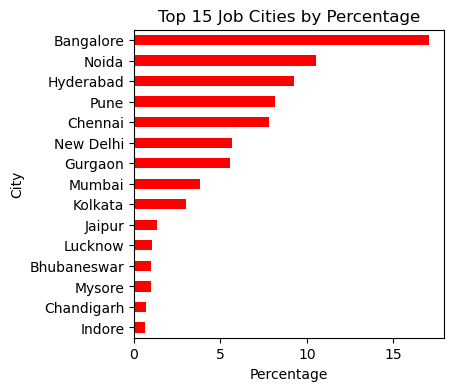

In [174]:
city_percentage = df["JobCity"].value_counts() / len(df) * 100
top_cities = city_percentage.head(15)
plt.figure(figsize=(4, 4))
top_cities.sort_values().plot(kind='barh', color='red')
plt.title('Top 15 Job Cities by Percentage')
plt.xlabel('Percentage')
plt.ylabel('City')
plt.show()

In [54]:
df["Gender"].value_counts()/len(df)*100

m    76.063032
f    23.936968
Name: Gender, dtype: float64

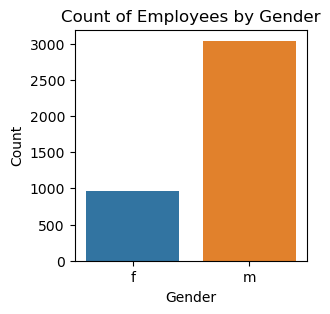

In [64]:
import seaborn as sns

plt.figure(figsize=(3, 3))
sns.countplot(x='Gender', data=df)
plt.title('Count of Employees by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [66]:
df["Degree"].value_counts()/len(df)*100

B.Tech/B.E.      92.546273
MCA               6.078039
M.Tech./M.E.      1.325663
M.Sc. (Tech.)     0.050025
Name: Degree, dtype: float64

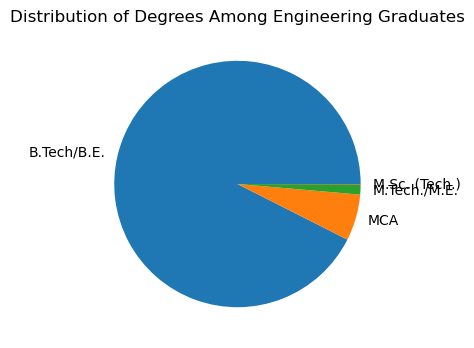

In [74]:
plt.figure(figsize=(4, 4))
plt.pie(df['Degree'].value_counts(), labels=df['Degree'].value_counts().index, startangle=360)
plt.title('Distribution of Degrees Among Engineering Graduates')
plt.show()

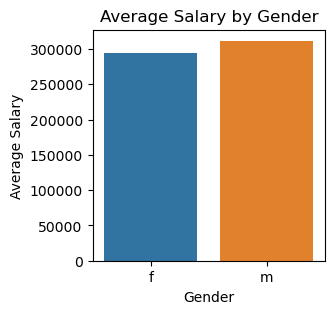

In [72]:
grouped_data = df.groupby('Gender')['Salary'].mean()
plt.figure(figsize=(3, 3))
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()

In [76]:
Hardware_engineer_jobs = ['Technical Support Engineer', 'Network Administrator', 'System Engineer', 'Systems Engineer']
Programmer_analyst_jobs = ['programmer analyst' , 'programmer analyst trainee']
Software_Engineer_jobs = ['Java Software Engineer', 'Programmer Analyst', 'Systems Analyst', 'Software Engineer'
'Java Developer', 'Assistant Software Engineer', 'Software Developer', 'Research Associate'
'Senior Software Engineer', 'Trainee Software Engineer', 'System Engineer', '.NET Developer'
'Project Engineer', 'Senior Java Developer', 'Software Development Engineer', 'Associate Software Engineer'

'Software Trainee', 'Assistant Systems Engineer', '.NET Web Developer', 'Assistant System Engineer'
'Software Engineer Associate', 'Software Analyst', 'Junior Software Engineer', 'Software Executive'
'Graduate Engineer Trainee' , 'Technology Analyst', 'Software Engineering Associate']
Associate_Engineer_jobs = ['Assistant Software Engineer', 'Associate Software Engineer' ,'Assistant Systems Engineer']

Hardware_engineer_jobs = [job.lower() for job in Hardware_engineer_jobs]
Programmer_analyst_jobs = [job.lower() for job in Programmer_analyst_jobs]
Software_Engineer_jobs = [job.lower() for job in Software_Engineer_jobs]
Associate_Engineer_jobs = [job.lower() for job in Associate_Engineer_jobs]

In [78]:
hardware_engineer_data = df[df['Designation'].isin(Hardware_engineer_jobs)]
programmer_analyst_data = df[df['Designation'].isin(Programmer_analyst_jobs)]
software_engineer_data = df[df['Designation'].isin(Software_Engineer_jobs)]
associate_engineer_data = df[df['Designation'].isin(Associate_Engineer_jobs)]

In [208]:
sns.catplot(x='Salary', y='Degree', kind='bar', data=df, ci=None, height=3, aspect=2)
plt.suptitle('Salary vs Degree')
plt.show()

In [204]:
# Does the level of experience affect the salary earned?
df['DOL'] = pd.to_datetime(df['DOL'], errors='coerce')

today_date = datetime.today().strftime('%Y-%m-%d')
df['DOL'] = df['DOL'].replace('present', today_date)

df['Duration_of_work'] = df['DOL'].dt.year - df['DOJ'].dt.year
sns.barplot(x="Duration_of_work", y="Salary", data=df)

<AxesSubplot:xlabel='Duration_of_work', ylabel='Salary'>

  Obtaining dependency information for fuzzywuzzy from https://files.pythonhosted.org/packages/43/ff/74f23998ad2f93b945c0309f825be92e04e0348e062026998b5eefef4c33/fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata


DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [94]:
from fuzzywuzzy import process
import pandas as pd

# Modify the function to handle NaN values
def correct_spelling_errors(target_word, choices=['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
                                                 'Hyderabad', 'Noida', 'Kolkata', 'Pune','N/A','Jhansi',
                                                 'Bhubaneswar', 'Mumbai', 'New Delhi',
                                                 'Mangalore', 'Rewari', 'Ghaziabad', 'Bhiwadi', 'Mysore', 'Rajkot',
                                                 'Jaipur', 'Thane', 'Maharajganj', 'Thiruvananthapuram', 'Panchkula',
                                                 'Coimbatore', 'Dhanbad', 'Lucknow', 'Gandhinagar', 'Una', 'Daman and Diu',
                                                 'Nagpur', 'Bhagalpur', 'New Delhi/Jaisalmer', 'Ahmedabad', 'Kochi/Cochin',
                                                 'Bankura', 'Kanpur', 'Vijayawada', 'Beawar', 'Alwar', 'Siliguri', 'Raipur',
                                                 'Bhopal', 'Faridabad', 'Jodhpur', 'Udaipur', 'Muzaffarpur', 'Bulandshahar',
                                                 'Haridwar', 'Raigarh', 'Visakhapatnam', 'Jabalpur', 'Unnao', 'Aurangabad',
                                                 'Belgaum', 'Dehradun', 'Rudrapur', 'Jamshedpur', 'Dharamshala',
                                                 'Hissar', 'Ranchi', 'Madurai', 'Chandigarh', 'Australia', 'Cheyyar', 'Sonipat',
                                                 'Jagdalpur', 'Angul', 'Baroda', ' Ariyalur', 'Jowai','Kochi/Cochin, Chennai and Coimbatore',
                                                 'Neemrana', 'Tirupati', 'Calicut', 'Dubai', 'Ahmednagar', 'Nashik', 'Bellary', 'Ludhiana', 'Muzaffarnagar',
                                                 'Gagret', 'Indirapuram, Ghaziabad','Gwalior', 'Chennai & Mumbai', 'Rajasthan', 'Bareli',
                                                 'Hospet', 'Miryalaguda', 'Dharuhera', 'Meerut', 'Dehradun', 'Ganjam', 'Hubli',
                                                 'Agra', 'Trichy', 'Kudankulam , Tarapur', 'Ongole', 'Sambalpur', 'Pondicherry',
                                                 'Sadulpur', 'Bikaner', 'Vadodara', 'India', 'Asansol',
                                                 'Tirunelvelli', 'Ernakulam', 'Bilaspur', 'Chandrapur', 'Nanded','Dharmapuri', 'Vandavasi', 'Rohtak',
                                                 'Patna','Salem','Technopark, Thiruvananthapuram', 'Bharuch', 'Tornagallu', 'Jaspur', 'Burdwan',
                                                 'Shimla', 'Jammu', 'Shahdol','Muvattupuzha', 'Al Jubail', 'Kalmar, Sweden','Secunderabad',
                                                 'Ratnagiri', 'Jhajjar', 'Gulbarga', 'Nalagarh', 'Jeddah', 'Jamnagar', 'Gonda',
                                                 'Odisha', 'Kharagpur', 'Navi Mumbai , Hyderabad', 'Joshimath', 'Bathinda', 'Johannesburg', 'Kala Amb',
                                                 'Karnal','London', 'Kota', 'Baddi', 'Nagari', 'Mettur', 'Durgapur', 'Bahadurgarh',
                                                 'Rayagada, Odisha', 'Kakinada', 'Surat', 'Kurnool', 'Kolhapur', 'Bhilai', 'Nellore', 'Meerut',
                                                 'Sahibabad', 'Howrah', 'Trichur', 'Ambala', 'Khopoli', 'Kerala', 'Roorkee', 'Allahabad',
                                                 'Delhi/NCR', 'Jalandhar', 'Manesar', 'Vapi', 'Pilani', 'Ras Al Khaimah', 'Bihar', 'Singaruli', 'Mohali',
                                                 'Phagwara', 'Baripada', 'Yamunanagar', 'Shahibabad', 'Sampla', 'Guwahati', 'Rourkela', 'Vellore', 'Dausa',
                                                 'Latur', 'Mainpuri', 'Rae Bareli', 'Dammam', 'Haldia', 'Patiala', 'Gorakhpur',
                                                 'Karad', 'Rajpura', 'Haryana'], threshold=80):
    if pd.isna(target_word):
        return target_word
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word

In [96]:
df['JobCity']=df['JobCity'].apply(correct_spelling_errors)

In [98]:
df['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Noida', 'Kolkata', 'Pune', <NA>, 'Mohali', 'Jhansi',
       'New Delhi', 'Bhubaneswar', 'Mumbai', 'Mangalore', 'Rewari',
       'Ghaziabad', 'Bhiwadi', 'Mysore', 'Rajkot', 'Jaipur', 'Thane',
       'Maharajganj', 'Thiruvananthapuram', 'Panchkula', 'Coimbatore',
       'Dhanbad', 'Lucknow', 'Trivandrum', 'Gandhinagar', 'Una',
       'Daman and Diu', 'Visakhapatnam', 'Nagpur', 'Bhagalpur',
       'New Delhi/Jaisalmer', 'Ahmedabad', 'Kochi/Cochin', 'Bankura',
       'Bengaluru', 'Kanpur', 'Vijayawada', 'Beawar', 'Alwar', 'Siliguri',
       'Raipur', 'Bhopal', 'Faridabad', 'Jodhpur', 'Udaipur',
       'Muzaffarpur', 'Bulandshahar', 'Haridwar', 'Raigarh', 'Jabalpur',
       'Unnao', 'Aurangabad', 'Belgaum', 'Dehradun', 'Rudrapur',
       'Jamshedpur', 'vizag', 'Dharamshala', 'Hissar', 'Ranchi',
       'Madurai', 'Chandigarh', 'Australia', 'Cheyyar', 'Sonipat',
       'Nagari', 'Jagdalpur', 'Angul', 'Baroda',

In [100]:
pd.Timestamp.now()

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
datetime.now()

datetime.datetime(2024, 10, 4, 0, 25, 40, 175609)

In [102]:
df['DOJ']=pd.to_datetime(df['DOJ'])

In [104]:
df['DOB']=pd.to_datetime(df['DOB'])

In [106]:
df['DOL']=df['DOL'].replace('present',pd.Timestamp.now())

In [108]:
df['DOL']=pd.to_datetime(df['DOL'])

In [110]:
df['JobCity'].value_counts(dropna=False)

Bangalore       683
<NA>            461
Noida           420
Hyderabad       370
Pune            327
               ... 
Nanded            1
Bankura           1
Ernakulam         1
Tirunelvelli      1
Haryana           1
Name: JobCity, Length: 205, dtype: int64

In [112]:
df['DOJ']=pd.to_datetime(df['DOJ']).dt.date
df['DOL']=pd.to_datetime(df['DOL']).dt.date

In [114]:
df['DOJ']=pd.to_datetime(df['DOJ'])
df['DOL']=pd.to_datetime(df['DOL'])

In [116]:
df['Age']=df['DOJ']-df['DOB']

In [118]:
df['Age']=(df['Age']//365).astype('str')

In [122]:
import re
df['Age']=df['Age'].apply(lambda x: int(re.findall(r'[0-9]+',x)[0]))

In [128]:
df['Age'].unique()

array([22, 23, 21, 25, 20, 28, 17, 31, 24, 27, 19, 26, 29, 11, 30,  1, 18],
      dtype=int64)

In [130]:
# Dropping rows where Age < 18 and JobCity is NA
df = df[~((df['Age'] < 18) & (df['JobCity'].isna()))]
df

Salary        DOJ        DOL                  Designation    JobCity  \
0      420000.0 2012-06-01 2024-10-03      senior quality engineer  Bangalore   
1      500000.0 2013-09-01 2024-10-03            assistant manager     Indore   
2      325000.0 2014-06-01 2024-10-03             systems engineer    Chennai   
3     1100000.0 2011-07-01 2024-10-03     senior software engineer    Gurgaon   
4      200000.0 2014-03-01 2015-03-01                          get    Manesar   
...         ...        ...        ...                          ...        ...   
3993   280000.0 2011-10-01 2012-10-01            software engineer  New Delhi   
3994   100000.0 2013-07-01 2013-07-01             technical writer  Hyderabad   
3995   320000.0 2013-07-01 2024-10-03  associate software engineer  Bangalore   
3996   200000.0 2014-07-01 2015-01-01           software developer  Bangalore   
3997   400000.0 2013-02-01 2024-10-03      senior systems engineer    Chennai   

     Gender        DOB  10percentage                         10board  \
0         f 1990-02-19         84.30  board ofsecondary education,ap   
1         m 1989-10-04         85.40                            cbse   
2         f 1992-08-03         85.00                            cbse   
3         m 1989-12-05         85.60                            cbse   
4         m 1991-02-27         78.00                            cbse   
...     ...        ...           ...                             ...   
3993      m 1987-04-15         52.09                            cbse   
3994      f 1992-08-27         90.00                     state board   
3995      m 1991-07-03         81.86                      bse,odisha   
3996      f 1992-03-20         78.72                     state board   
3997      f 1991-02-26         70.60                            cbse   

      12graduation  ...  ElectricalEngg TelecomEngg  CivilEngg  \
0             2007  ...              -1          -1         -1   
1             2007  ...              -1          -1         -1   
2             2010  ...              -1          -1         -1   
3             2007  ...              -1          -1         -1   
4             2008  ...              -1          -1         -1   
...            ...  ...             ...         ...        ...   
3993          2006  ...              -1          -1         -1   
3994          2009  ...              -1          -1         -1   
3995          2008  ...              -1          -1         -1   
3996          2010  ...              -1          -1         -1   
3997          2008  ...              -1          -1         -1   

     conscientiousness agreeableness  extraversion  nueroticism  \
0               0.9737        0.8128        0.5269      1.35490   
1              -0.7335        0.3789        1.2396     -0.10760   
2               0.2718        1.7109        0.1637     -0.86820   
3               0.0464        0.3448       -0.3440     -0.40780   
4              -0.8810       -0.2793       -1.0697      0.09163   
...                ...           ...           ...          ...   
3993           -0.1082        0.3448        0.2366      0.64980   
3994           -0.3027        0.8784        0.9322      0.77980   
3995           -1.5765       -1.5273       -1.5051     -1.31840   
3996           -0.1590        0.0459       -0.4511     -0.36120   
3997           -1.1128       -0.2793       -0.6343      1.32553   

     openess_to_experience  Age  Duration_of_work  
0                  -0.4455   22                12  
1                   0.8637   23                11  
2                   0.6721   21                10  
3                  -0.9194   21                13  
4                  -0.1295   23                 1  
...                    ...  ...               ...  
3993               -0.9194   24                 1  
3994               -0.0943   20                 0  
3995               -0.7615   22                11  
3996               -0.0943   22                 1  
3

In [132]:
df['Experience']=((df['DOL'].dt.date-df['DOJ'].dt.date)//365).astype('str')

In [134]:
df['Experience']=df['Experience'].apply(lambda x: int(re.findall(r'[0-9]+',x)[0]))

In [150]:
df['Experience'].value_counts()

0     948
10    848
1     707
11    400
2     297
9     265
12    215
3     132
13    109
4      37
14     33
8       2
5       1
18      1
6       1
33      1
17      1
Name: Experience, dtype: int64

In [166]:
# Filter data for fresh graduates (0 years of experience) in specified job roles
fresh_graduates = df[(df['Experience'] == 0) & (df['Designation'].isin(Hardware_engineer_jobs + Programmer_analyst_jobs + Software_Engineer_jobs + Associate_Engineer_jobs))]

# Calculate the average salary for these roles
avg_salary_fresh_graduates = fresh_graduates.groupby('Designation')['Salary'].mean()

# Display the average salaries
avg_salary_fresh_graduates

Designation
.net web developer               242500.000000
assistant software engineer      120000.000000
associate software engineer      284642.857143
java software engineer           214629.629630
junior software engineer         266666.666667
network administrator            145000.000000
programmer analyst               318333.333333
programmer analyst trainee       317500.000000
software developer               176250.000000
software development engineer    289000.000000
system engineer                  288448.275862
systems engineer                 327187.500000
technical support engineer       193928.571429
technology analyst               650000.000000
trainee software engineer        125000.000000
Name: Salary, dtype: float64

In [168]:
# Test the hypothesis that fresh graduates earn between 2.5-3 lakhs
# We will check the percentage of job roles with average salary within this range
within_range = avg_salary_fresh_graduates[(avg_salary_fresh_graduates >= 250000) & (avg_salary_fresh_graduates <= 300000)]
percentage_within_range = (len(within_range) / len(avg_salary_fresh_graduates)) * 100
percentage_within_range

26.666666666666668

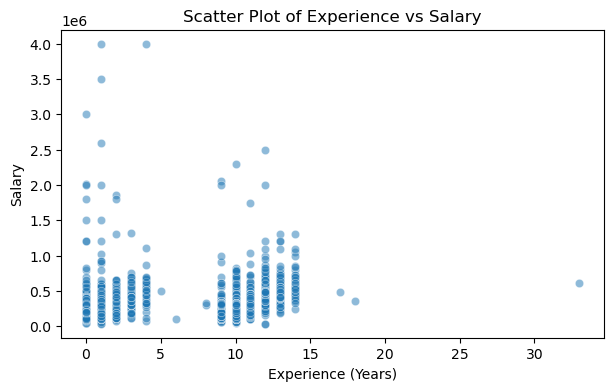

0.2397550814663974

In [214]:
# Check the hypothesis: Does the level of experience affect the salary earned?

# Plotting the relationship between experience and salary
plt.figure(figsize=(7, 4))
sns.scatterplot(x='Experience', y='Salary', data=df, alpha=0.5)
plt.title('Scatter Plot of Experience vs Salary')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.show()

# Calculate correlation
correlation = df['Experience'].corr(df['Salary'])
correlation

The scatter plot visualizes the relationship between experience and salary. From the plot, you can observe a general trend where salary tends to increase with experience, although the correlation is not very strong. The calculated correlation coefficient is approximately 0.24, indicating a weak positive correlation between experience and salary.

This suggests that while there is some relationship between experience and salary, other factors may also play a significant role in determining salary levels.